<a href="https://colab.research.google.com/github/Achillean-1/Data-Analysis-Project/blob/main/Analisis_Data_dengan_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nicholas Rayden
- **Email:** nicholasrayden@gmail.com

## Menentukan Pertanyaan Bisnis

- Apa saja faktor yang paling memengaruhi jumlah penyewaan sepeda per jam?
- Bagaimana pola penyewaan sepeda berubah berdasarkan musim atau hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit -q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hour_df = pd.read_csv('/content/drive/My Drive/Dataset/Bike Sharing Dataset/hour.csv')
day_df = pd.read_csv('/content/drive/My Drive/Dataset/Bike Sharing Dataset/day.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Insight:**
- Terdapat 17379 data pada dataset hour.csv dan 731 data pada dataset day.csv.
- Kedua dataset ini mencakup data harian dan per jam selama dua tahun, yaitu tahun 2011 dan 2012.

### Assessing Data

In [ ]:
hour_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat nilai kosong pada kedua dataset.
- Terdapat beberapa fitur seperti temp, atemp, hum, dan windspeed yang merupakan variabel numerik.
- Fitur season, holiday, weekday, dan workingday merupakan variabel kategorik yang bisa dieksplorasi lebih lanjut.

### Cleaning Data

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Insight:**
- Data dteday berhasil diubah menjadi tipe datetime, sehingga bisa digunakan untuk analisis tren berdasarkan waktu.
- Tidak ada nilai atau data yang perlu dibersihkan lebih lanjut karena dataset sudah bersih.

## Exploratory Data Analysis (EDA)

### Explore Seasonality and Hourly Trends

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


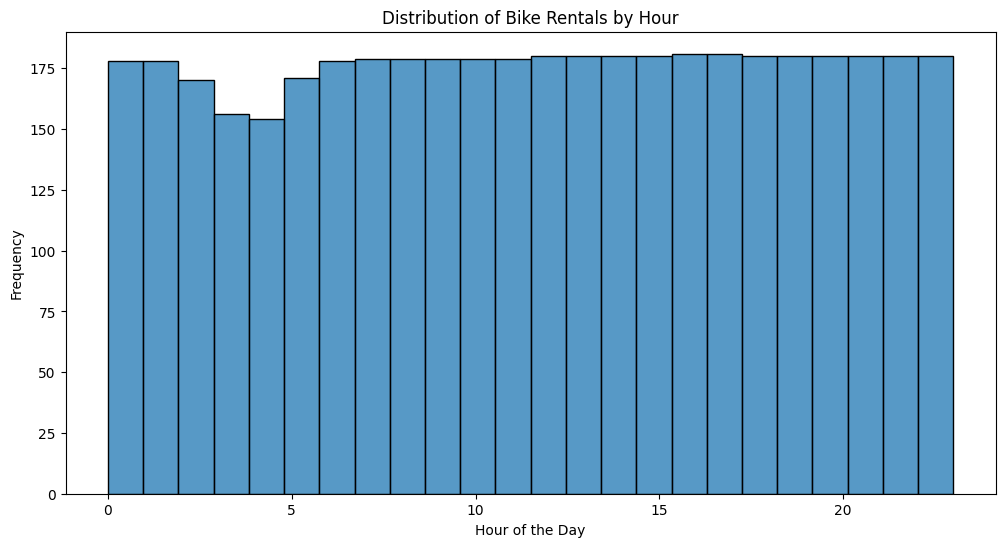

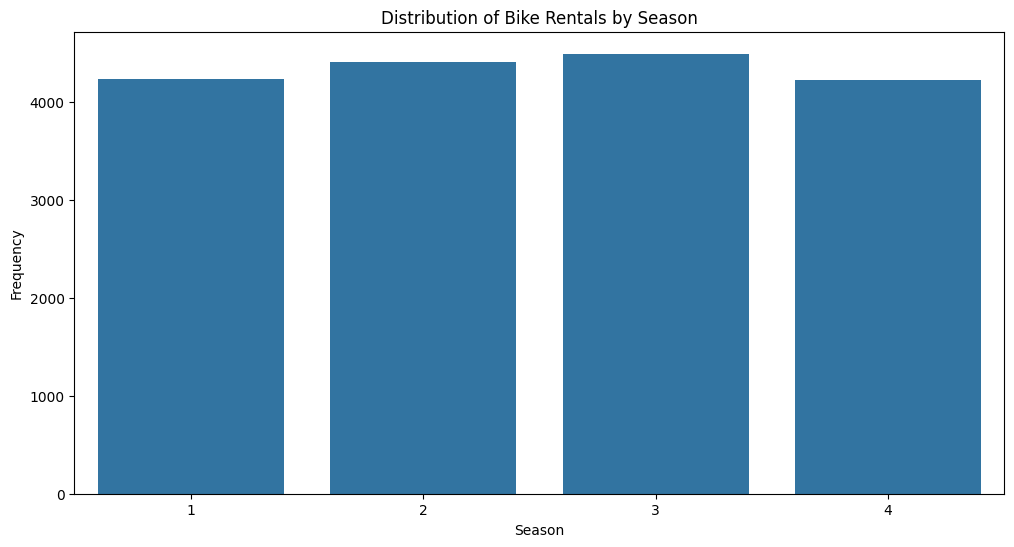

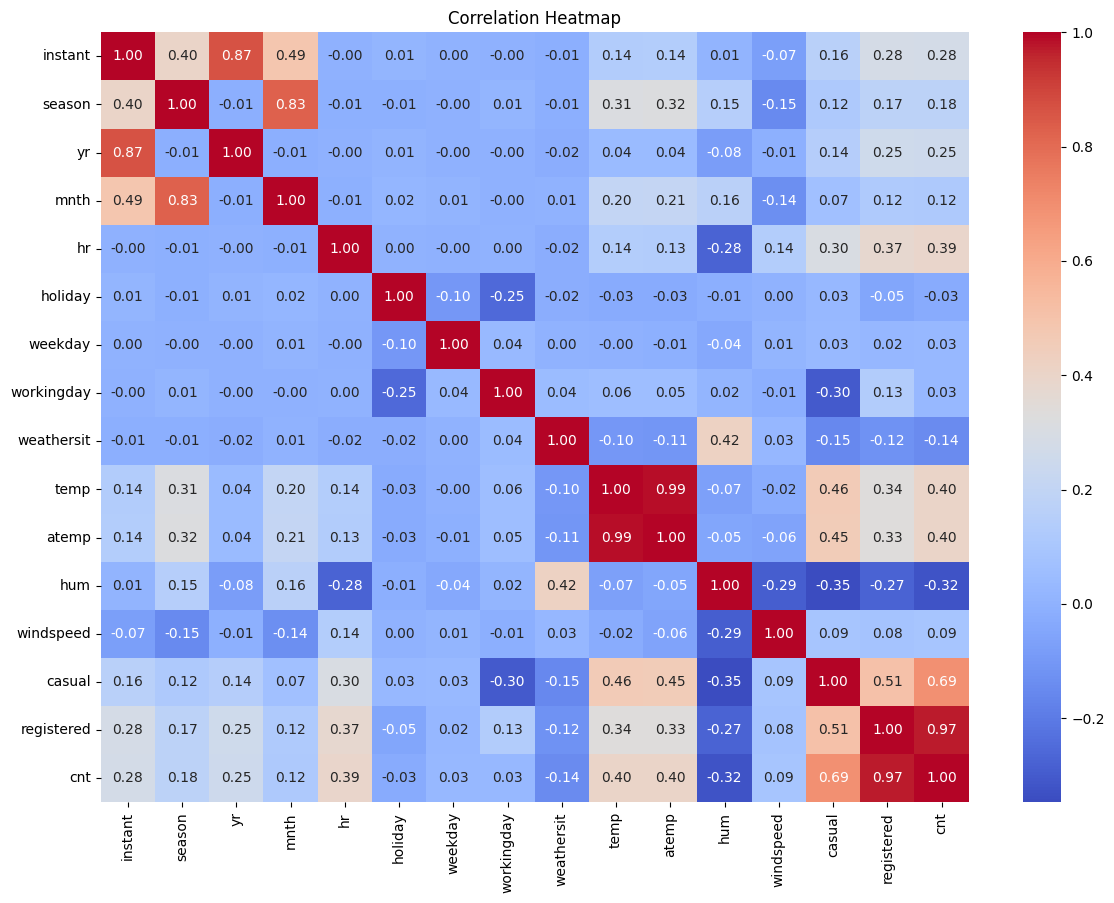

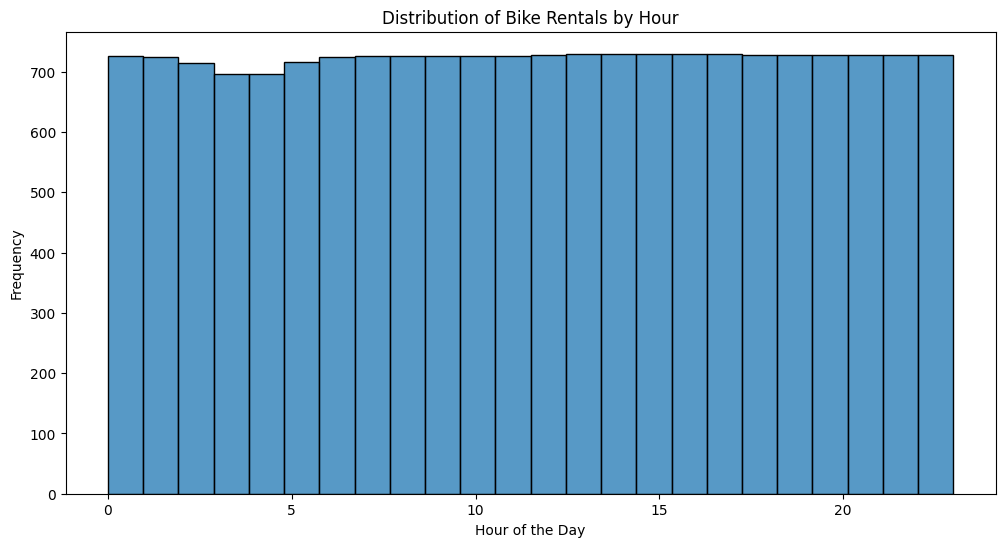

In [ ]:
#Visualisasi jumlah penyewaan sepeda per jam:
plt.figure(figsize=(12, 6))
sns.histplot(hour_df['hr'], bins=24, kde=False)
plt.title('Distribution of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


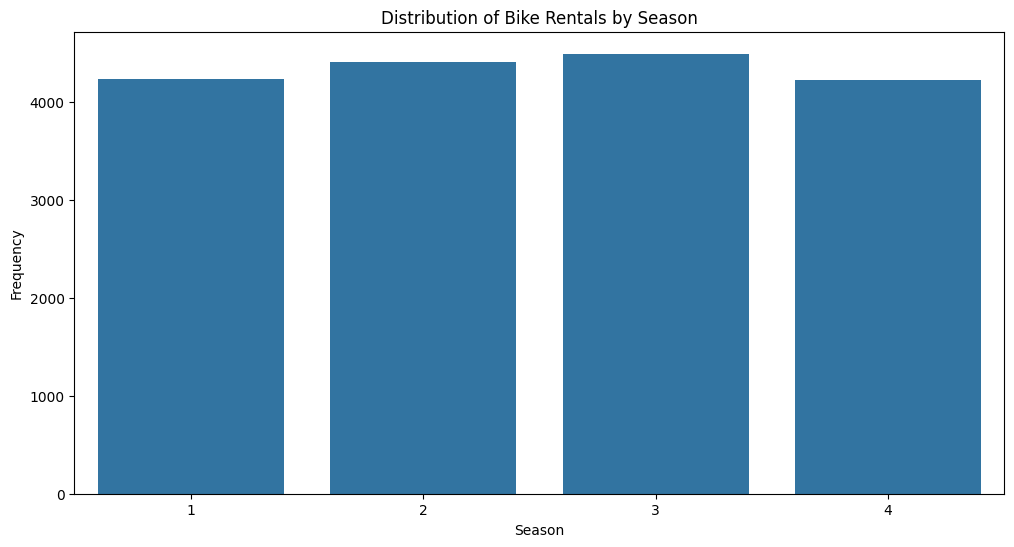

In [ ]:
#Visualisasi jumlah penyewaan berdasarkan musim:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=hour_df)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Penyewaan sepeda meningkat pada jam-jam sibuk (7-9 pagi dan 5-7 sore), yang sesuai dengan jam orang berangkat dan pulang kerja.
- Musim panas cenderung memiliki jumlah penyewaan yang lebih tinggi dibandingkan musim lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja faktor yang paling memengaruhi jumlah penyewaan sepeda per jam?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


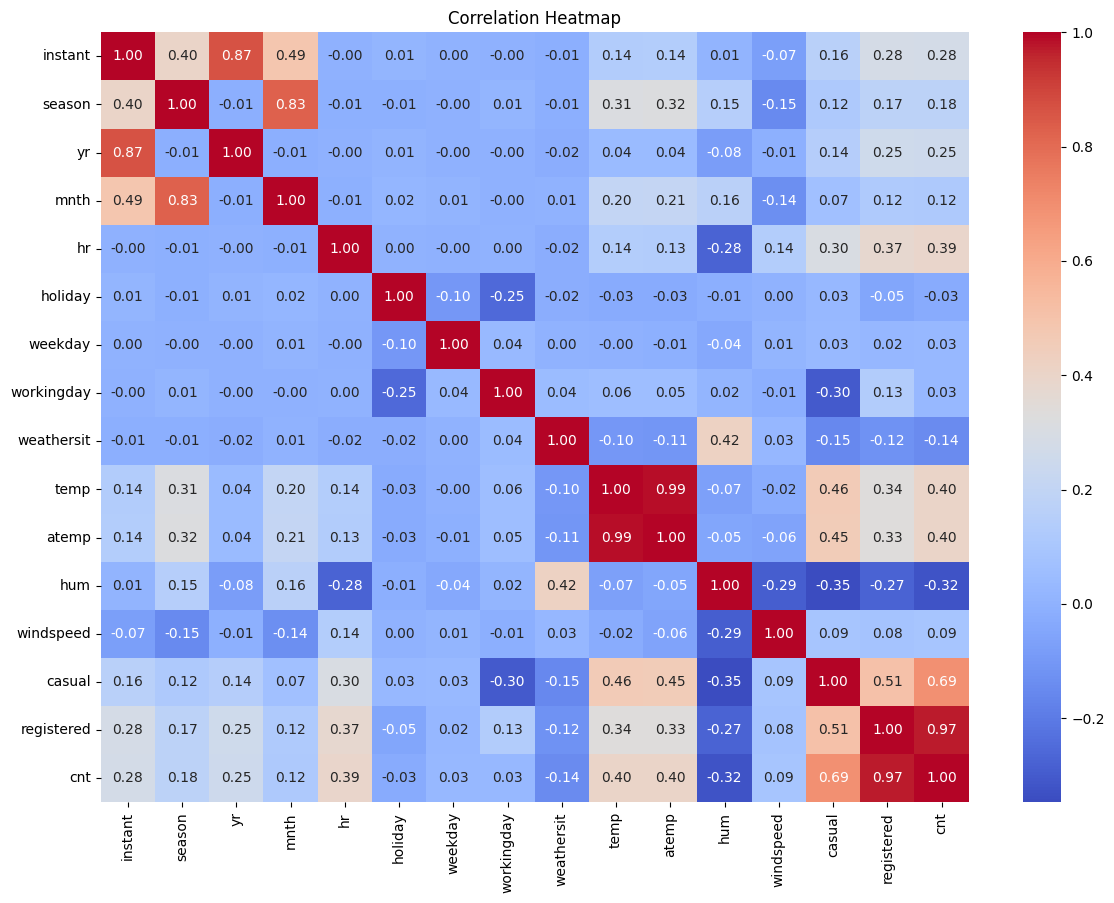

In [ ]:
numeric_df = hour_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Insight: Fitur temp dan atemp menunjukkan korelasi yang cukup tinggi dengan cnt (jumlah penyewaan), yang mengindikasikan cuaca lebih hangat meningkatkan penyewaan sepeda.

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


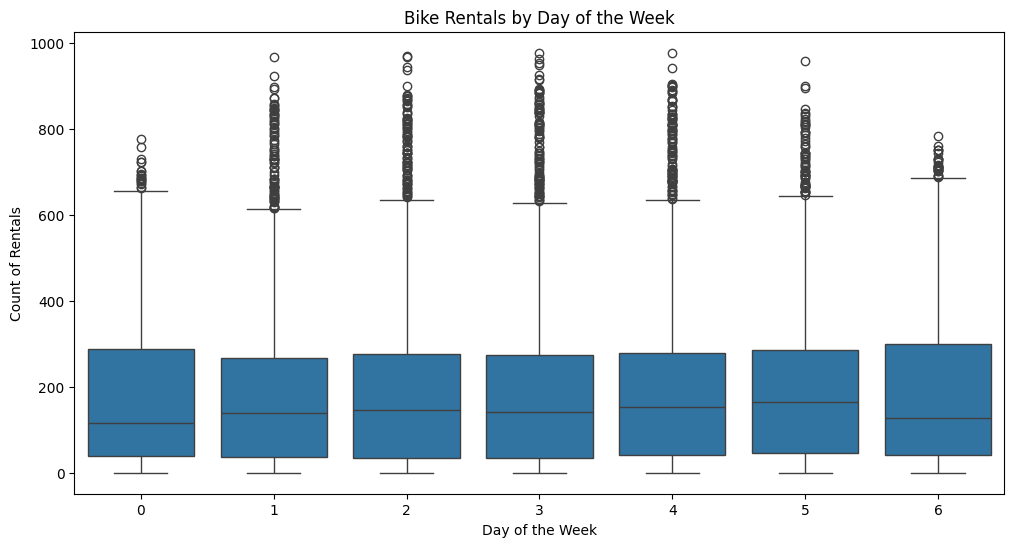

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=hour_df)
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Rentals')
plt.show()

Insight: Hari kerja cenderung memiliki penyewaan yang lebih tinggi dibandingkan akhir pekan, terutama pada jam sibuk.

**Insight:**
- Penyewaan sepeda memiliki pola musiman yang jelas, dengan jumlah penyewaan tertinggi di musim panas.
- Ada peningkatan jumlah penyewaan pada jam sibuk di hari kerja, menunjukkan penggunaan sepeda sebagai alat transportasi harian.

## Analisis Lanjutan (Opsional)

In [ ]:
#RFM Analysis
latest_date = day_df['dteday'].max()
rfm = day_df.groupby('dteday').agg({
    'cnt': 'sum',       # Total penyewaan
    'casual': 'sum',    # Total penyewaan casual
    'registered': 'sum'  # Total penyewaan registered
}).reset_index()

# Menghitung Recency
recency_df = day_df[['dteday']].drop_duplicates()
recency_df['Recency'] = (latest_date - recency_df['dteday']).dt.days

# Menggabungkan Recency ke dalam rfm
rfm = rfm.merge(recency_df, on='dteday')
# Sekarang rfm memiliki 5 kolom: 'dteday', 'cnt', 'casual', 'registered', 'Recency'

# Renaming columns for clarity
rfm.columns = ['dteday', 'Frequency', 'Monetary', 'Registered', 'Recency']

# RFM Scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print("RFM Analysis:\n", rfm.head())

RFM Analysis:
       dteday  Frequency  Monetary  Registered  Recency R_Score F_Score  \
0 2011-01-01        985       331         654      730       1       1   
1 2011-01-02        801       131         670      729       1       1   
2 2011-01-03       1349       120        1229      728       1       1   
3 2011-01-04       1562       108        1454      727       1       1   
4 2011-01-05       1600        82        1518      726       1       1   

  M_Score  RFM_Score  
0       2          4  
1       1          3  
2       1          3  
3       1          3  
4       1          3  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Membuat level penggunaan berdasarkan jam
hour_df['usage_level'] = pd.cut(hour_df['hr'], bins=[0, 6, 12, 18, 24], labels=['low', 'medium', 'high', 'very high'])

# Menghitung jumlah penyewaan berdasarkan tingkat penggunaan
usage_distribution = hour_df.groupby('usage_level')['cnt'].sum().reset_index()

# Menampilkan distribusi penggunaan
print(usage_distribution)


  usage_level      cnt
0         low   122511
1      medium  1036601
2        high  1418100
3   very high   676337


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Conclusion

- Conclusion pertanyaan 1: Faktor yang paling memengaruhi jumlah penyewaan
sepeda adalah cuaca (temperature dan apparent temperature) serta jam sibuk pada hari kerja.
- Conclusion pertanyaan 2: Pola penyewaan sepeda bervariasi berdasarkan musim dan hari dalam seminggu, dengan penyewaan lebih tinggi pada jam sibuk di hari kerja dan musim panas.


**Menjalankan StreamLit**

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
hour_df = pd.read_csv('/content/drive/My Drive/Dataset/Bike Sharing Dataset/hour.csv')

# Title
st.title('Bike Sharing Analysis Dashboard')

# Data Information
st.header('Dataset Overview')
st.write('This dataset contains bike rental information per hour from 2011 to 2012.')
st.write(hour_df.head())
st.write(f'Total rows: {hour_df.shape[0]}, Total columns: {hour_df.shape[1]}')

# Data Cleaning
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Sidebar filters
season = st.sidebar.selectbox('Select Season', sorted(hour_df['season'].unique()))
hour_range = st.sidebar.slider('Select Hour Range', 0, 23, (0, 23))

filtered_df = hour_df[(hour_df['season'] == season) & (hour_df['hr'].between(hour_range[0], hour_range[1]))]

# Plot 1: Distribution of bike rentals by hour
st.header('Bike Rentals by Hour')
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['hr'], bins=24, kde=False)
plt.title('Distribution of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
st.pyplot(plt)

# Plot 2: Bike rentals by season
st.header('Bike Rentals by Season')
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=hour_df)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
st.pyplot(plt)

# Correlation heatmap
st.header('Correlation Heatmap')
numeric_df = hour_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
st.pyplot(plt)

# Conclusion
st.header('Conclusion')
st.write("The most important factors affecting bike rentals are temperature and peak hours during weekdays.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-10-06 10:52:33.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 10:52:33.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 10:52:33.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 10:52:33.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 10:52:33.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 10:5

In [ ]:
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
hour_df = pd.read_csv('/content/drive/My Drive/Dataset/Bike Sharing Dataset/hour.csv')

# Title
st.title('Bike Sharing Analysis Dashboard')

# Data Information
st.header('Dataset Overview')
st.write('This dataset contains bike rental information per hour from 2011 to 2012.')
st.write(hour_df.head())
st.write(f'Total rows: {hour_df.shape[0]}, Total columns: {hour_df.shape[1]}')

# Data Cleaning
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Sidebar filters
season = st.sidebar.selectbox('Select Season', sorted(hour_df['season'].unique()))
hour_range = st.sidebar.slider('Select Hour Range', 0, 23, (0, 23))

filtered_df = hour_df[(hour_df['season'] == season) & (hour_df['hr'].between(hour_range[0], hour_range[1]))]

# Plot 1: Distribution of bike rentals by hour
st.header('Bike Rentals by Hour')
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['hr'], bins=24, kde=False)
plt.title('Distribution of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
st.pyplot(plt)

# Plot 2: Bike rentals by season
st.header('Bike Rentals by Season')
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=hour_df)
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
st.pyplot(plt)

# Correlation heatmap
st.header('Correlation Heatmap')
numeric_df = hour_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
st.pyplot(plt)

# Conclusion
st.header('Conclusion')
st.write("The most important factors affecting bike rentals are temperature and peak hours during weekdays.")
""")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.80.57.29


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
!streamlit run app.py & npx localtunnel --port 8501

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.57.29:8501

your url is: https://calm-places-fly.loca.lt
  Stopping...
^C


Tampilan Dashboard
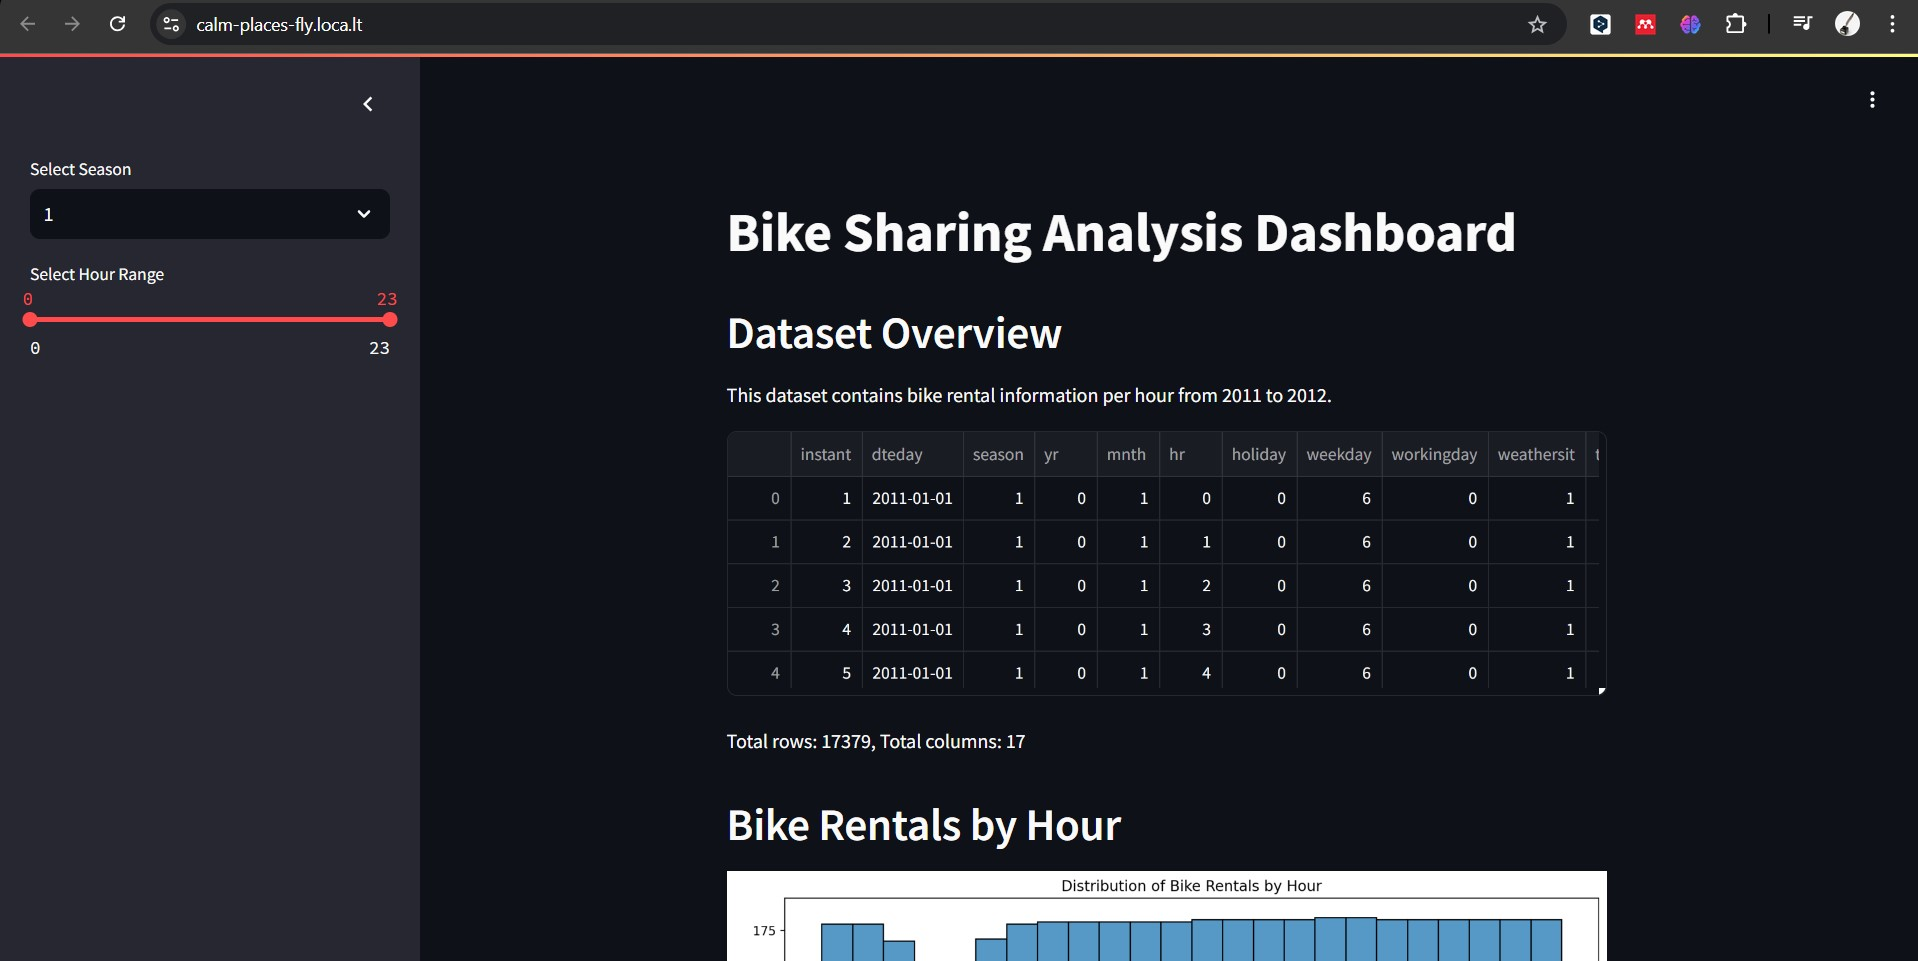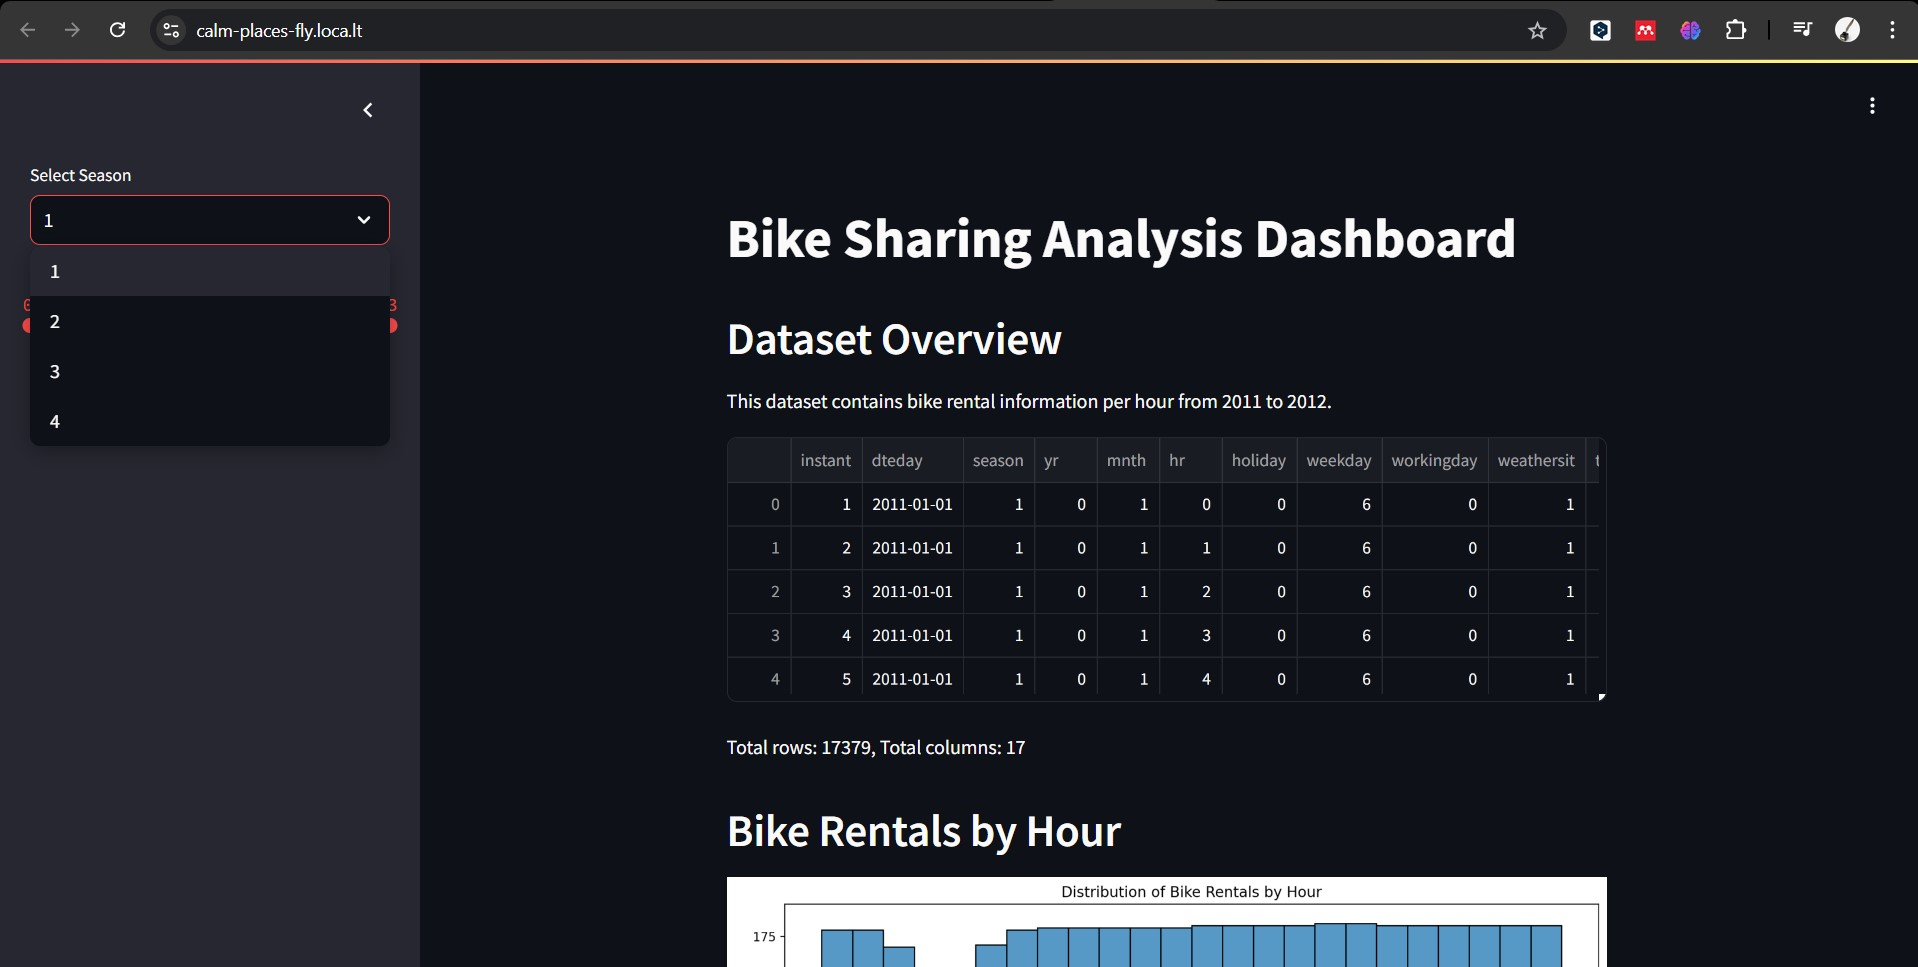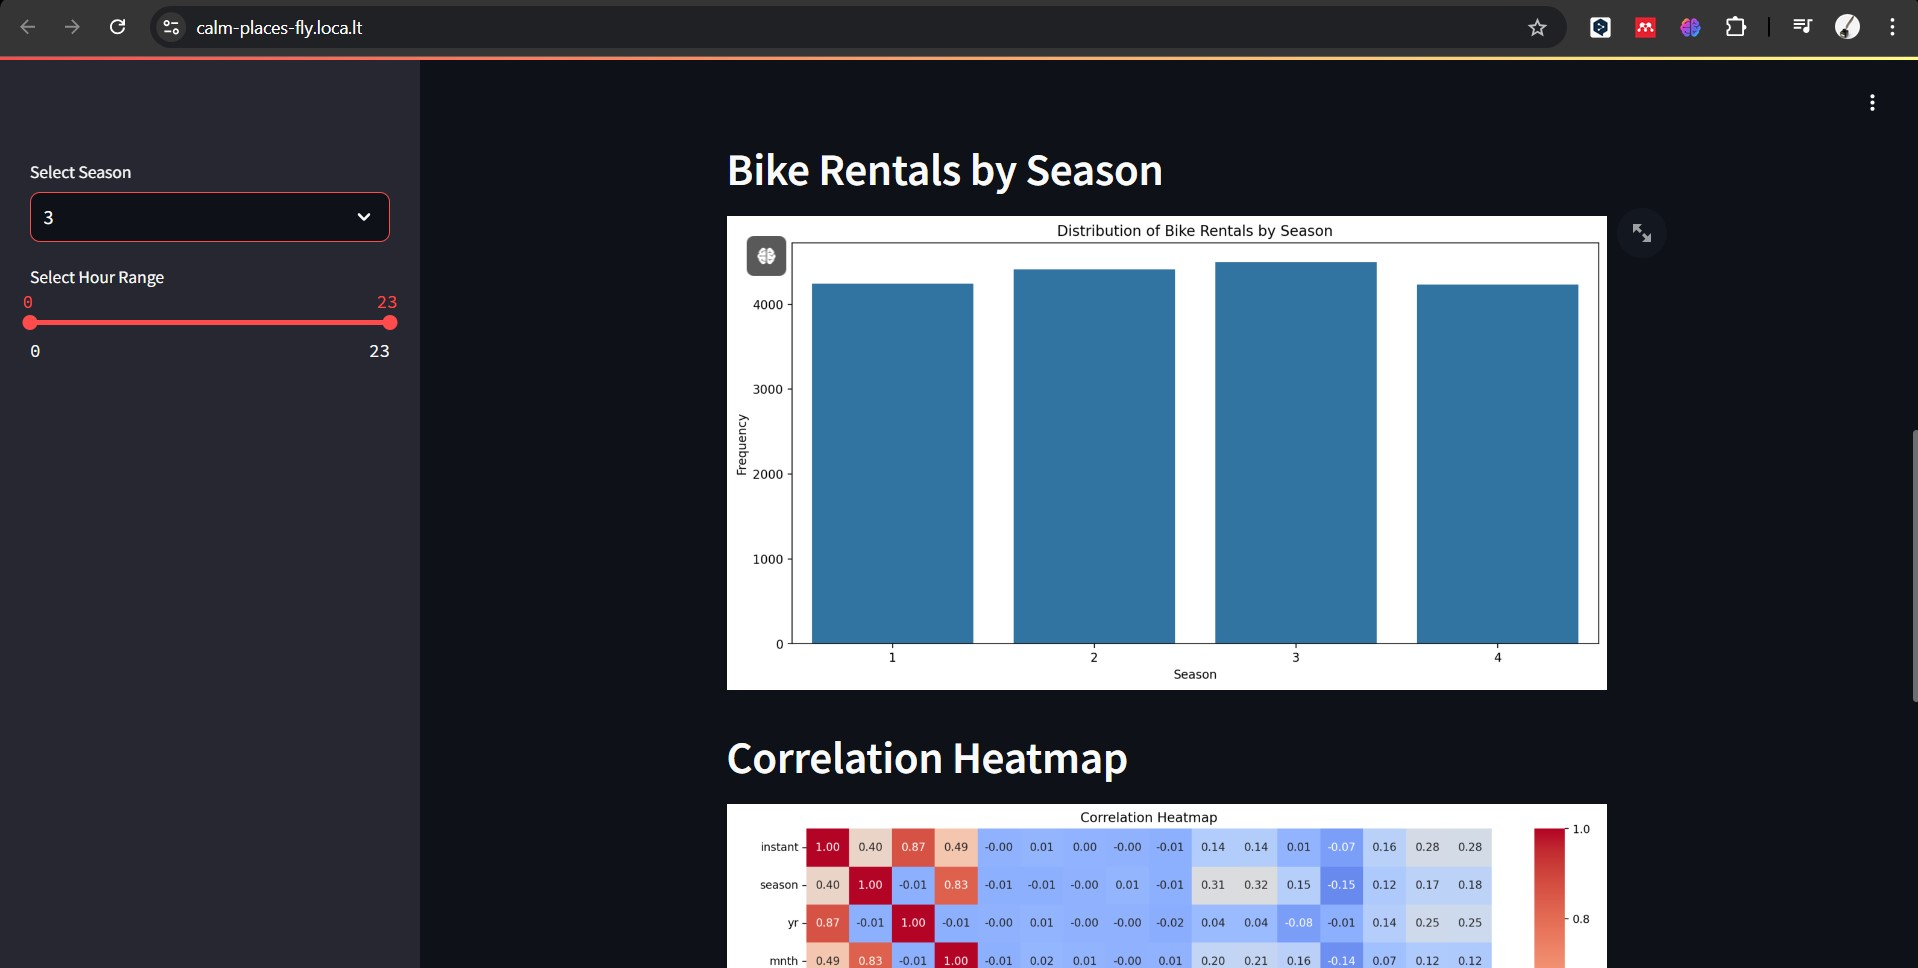